Романовский А.Н. 19.09.2022

### Задание:

#### 1. Загрузить текстовый файл из корневого каталога обьемом не мнеее 20000 символов.
#### 2. Подсчет частоты встречаемости слов в загруженном файле (критерий схожести слов выбрать самостоятельно).
#### 3. Подсчет длин предложений и их количества. 
#### 4. Ввод полученных данных в объект DataFrame и Series, а также отображение полученных результатов в виде таблицы "объекты - признаки".
#### 5. Построение гистограммы частоты встречаемости слов.
----

### Реализация: 
#### Из задания шаги 1-4 и 5

1. Загрузка библиотек и файла
2. Опеределение количества символов в файле
3. Очистка текста отзнаков пунктуации 
4. Приведение слов к базовой форме
5. Очистка списка от коротких слов и удаление стоп-слов
6. Создание Counter словаря с базовой формой слов и их колличества 
7. Создание обьекта DataFrame и визулизация 
----

In [1]:
import codecs 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from collections import Counter
#для лемматизации
from pymystem3 import Mystem
from spacy.lang.ru.stop_words import STOP_WORDS


#### 2. Загрузка файла и подсчет

In [2]:
text = codecs.open("Tolstoy.txt","r",encoding = "UTF8" )

In [3]:
string_text ="" 
for word in text:
    string_text += word.strip() # записываем текст в переменную, удаляя символы табуляции
text.close()

In [4]:
len(string_text) #подсчет символов 

128393

#### 3. Подготовка текста

In [5]:
for _ in string.punctuation: #удаляем все знаки пунктуации 
    if _ in string_text:
        string_text = string_text.replace(_,'')
string_text = string_text.lower() #приводим слова к одинаковому регистру(маленькому)



#### 4. Лемматизация. Mystem - морфологический анализатор русского языка с поддержкой снятия морфологической неоднозначности


In [6]:
lemma = Mystem()
new_word = lemma.lemmatize(string_text)   
#приводим слова к базовой форме 

#### 5. Очистка списка от мусорных слов 

In [7]:
new_word =  [i for i in new_word if len(i) >= 3] #добавляем в список слова длинна которых больше 3
new_word = [i for i in new_word if not i in STOP_WORDS] # удаляем слова которые есть в списке стоп слов

In [8]:
len(new_word)

9172

#### 6. Словарь содержащий базовую форму слов и их количество 

In [9]:
c = Counter(list(new_word)) #вид словаря, который позволяет нам считать количество неизменяемых объектов
d = c.most_common(10)       #возвращает (n) наиболее часто встречающихся элементов, в порядке убывания 


#### 7. Обьект DataFrame 
20 наиболее повторящихся слов

In [10]:
s = pd.DataFrame(c.most_common(), columns=['Слова','Количество'])
a = s.head(20)
a

,Слова,Количество
0,жизнь,354
1,человек,181
2,вопрос,127
3,жить,125
4,вера,110
5,понимать,110
6,знать,92
7,смысл,89
8,знание,86
9,ответ,70


#### Визуализация 

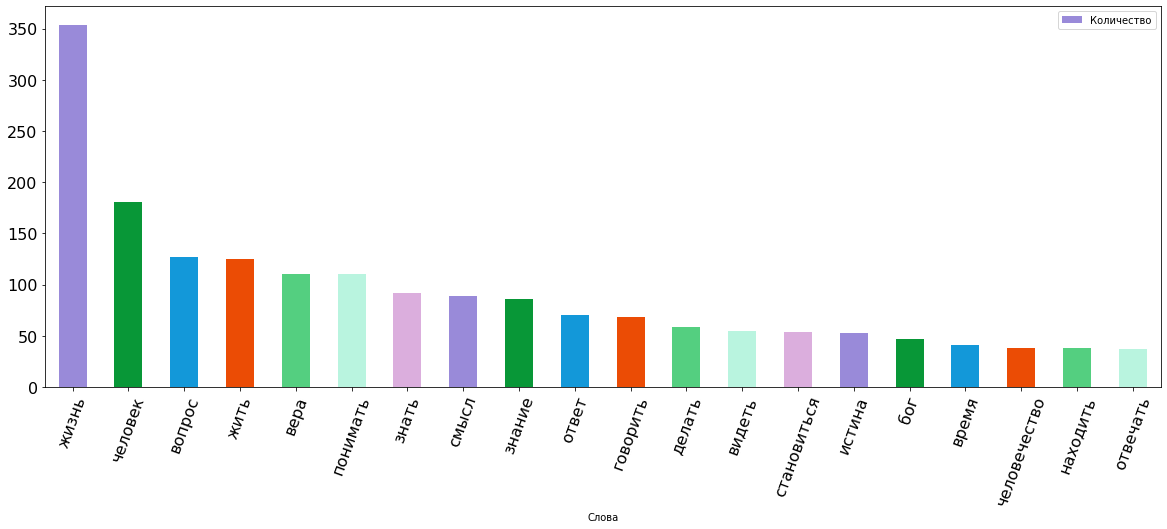

In [13]:
rgb_1 = np.random.rand(7,3)    # цвет
ax = a.plot.bar(x='Слова', y='Количество',color = rgb_1, rot=70 ,figsize=(20,7), fontsize=16) #настройки отоброжения


---- 
### Из задания шаги 3-4
1. Открытие файла и запись в переменную

In [14]:
text = codecs.open("Tolstoy.txt","r",encoding = "UTF8" )
string_text ="" 
for word in text:
    string_text += word.strip() # записываем текст в переменную, удаляя символы табуляции
text.close()

#### 2. Создание функции для очистки переменной от цифр и знаков пунктуации

In [15]:
def counter_words(string_text):  #функция удаляет все знаки пунктуации и переводы строки  
    for numbers in '1234567890':
        string_text=string_text.replace(numbers, '')
    for punctuation in ")(,:';-\n\t":
        string_text=string_text.replace(punctuation, '')
    for punctuation_2 in "...!?":
        string_text=string_text.replace(punctuation_2, '.')#меняем все знаки окончания предложения на точки
    string_text = string_text.lower() #меняет все заглавные буквы на маленькие 
    words = string_text.split('.') #создает список из слов по точкам
    return words    

#### 3. Отоброжение результата 

In [16]:
counter = pd.DataFrame(
            {'Предложение': counter_words(string_text) , #в качестве индекса само предложение 
             'Длина предложенией': (list(map(len, counter_words(string_text))))}) #считаем количество знаков 

counter.head(20)

,Предложение,Длина предложенией
0,исповедьвступление к ненапечатанному сочинению...,102
1,меня учили ей и с детства и во всё время моег...,67
2,но когда я ти лет вышел со второго курса унив...,103
3,судя по некоторым воспоминаниям я никогда и не...,184
4,помню что когда мне было лет одиннадцать один ...,80
5,учившийся в гимназии придя к нам на воскресен...,112
6,открытие состояло в том что бога нет и что вс...,91
7,помню как старшие братья заинтересовались это...,80
8,мы все помню очень оживились и приняли это из...,101
9,помню ещё что когда старший мой брат дмитрий б...,285
